In [19]:
import os
import numpy as np
from cmdstanpy import cmdstan_path, CmdStanModel

import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

import cmdstanpy
cmdstanpy.install_cmdstan()

cmdstan_path()

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed


'/root/.cmdstan/cmdstan-2.31.0'

In [20]:
import pandas as pd
data = pd.read_csv("/content/viaggi_individui_2014_2021.csv")

mask = data.annrif != 2014
mask2 = data.annrif != 2015
mask3 = data.annrif != 2016
mask4 = data.annrif != 2018
mask5 = data.annrif != 2020
res = mask * mask2 * mask3 * mask4 * mask5 
data1 = data[res].drop("Unnamed: 0",axis = 1).fillna(-1)
data = data1

print(data.shape)

from sklearn.preprocessing import OneHotEncoder

(147721, 25)


In [21]:

data_2 = data[data.annrif == 2019]
m = data_2.DURATA > 0
data_2_trav = data_2[m]
print(data_2_trav.shape)
data_2_notrav = data_2[~m]
print(data_2_notrav.shape)
data_2_trav = data_2_trav.sample(n=1300, random_state=1)
data_2_notrav = data_2_notrav.sample(n=1300, random_state=1)
print(data_2_trav.shape)
print(data_2_notrav.shape)

data_3 = data[data.annrif == 2021]
m = data_3.DURATA > 0
data_3_trav = data_3[m]
print(data_3_trav.shape)
data_3_notrav = data_3[~m]
print(data_3_notrav.shape)
data_3_trav = data_3_trav.sample(n=1300, random_state=1)
data_3_notrav = data_3_notrav.sample(n=1300, random_state=1)
print(data_3_trav.shape)
print(data_3_notrav.shape)

#data_ = pd.concat([data_1_trav,data_1_notrav,data_2_trav,data_2_notrav,data_3_trav,data_3_notrav])
data_ = pd.concat([data_2_trav,data_2_notrav,data_3_trav,data_3_notrav])
data = data_

(4393, 25)
(38801, 25)
(1300, 25)
(1300, 25)
(4284, 25)
(60602, 25)
(1300, 25)
(1300, 25)


In [22]:
df = pd.DataFrame()

In [ ]:


# sex
'''
name = "sesso"
cols = ["female"]

enc = OneHotEncoder()
or_val = data[name]
#print(or_val.value_counts())
#print(or_val.head())
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
t_val = t_val[:,1:]
df_temp = pd.DataFrame(t_val)
df_temp.columns = cols
#print(df_temp.head())

df[cols] = df_temp
'''


'\nname = "sesso"\ncols = ["female"]\n\nenc = OneHotEncoder()\nor_val = data[name]\n#print(or_val.value_counts())\n#print(or_val.head())\nor_val = or_val.values.reshape(-1,1)\nt_val = enc.fit(or_val).transform(or_val)\nt_val = t_val.toarray()\nt_val = t_val[:,1:]\ndf_temp = pd.DataFrame(t_val)\ndf_temp.columns = cols\n#print(df_temp.head())\n\ndf[cols] = df_temp\n'

In [ ]:
# age
'''
name = "eta10"
cols = ["15-24","25-34","35-44","45-54","55-64","65-75",">=75"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
t_val = t_val[:,1:]
df_temp = pd.DataFrame(t_val)
df_temp.columns = cols

df[cols] = df_temp
'''

'\nname = "eta10"\ncols = ["15-24","25-34","35-44","45-54","55-64","65-75",">=75"]\n\nenc = OneHotEncoder()\nor_val = data[name]\nor_val = or_val.values.reshape(-1,1)\nt_val = enc.fit(or_val).transform(or_val)\nt_val = t_val.toarray()\nt_val = t_val[:,1:]\ndf_temp = pd.DataFrame(t_val)\ndf_temp.columns = cols\n\ndf[cols] = df_temp\n'

In [23]:
# civil state
name = "staciv4"
cols = ["married","divorced","widowed"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
t_val = t_val[:,1:]
df_temp = pd.DataFrame(t_val)
df_temp.columns = cols

df[cols] = df_temp

In [24]:

# region of origin
name = "rip"
cols = ["North-East","Center","South","Islands"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
t_val = t_val[:,1:]
df_temp = pd.DataFrame(t_val)
df_temp.columns = cols

df[cols] = df_temp

In [25]:
# education level
name = "istr4"
cols = ["middle school","high school","university"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
t_val = t_val[:,1:]
df_temp = pd.DataFrame(t_val)
df_temp.columns = cols

df[cols] = df_temp

In [ ]:
# time at work
'''
name = "ORARIO"
cols = ["full time","part time"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
df_temp = pd.DataFrame(t_val)
df_temp = df_temp.loc[:,1:2]
df_temp.columns = cols

df[cols] = df_temp
'''

'\nname = "ORARIO"\ncols = ["full time","part time"]\n\nenc = OneHotEncoder()\nor_val = data[name]\nor_val = or_val.values.reshape(-1,1)\nt_val = enc.fit(or_val).transform(or_val)\nt_val = t_val.toarray()\ndf_temp = pd.DataFrame(t_val)\ndf_temp = df_temp.loc[:,1:2]\ndf_temp.columns = cols\n\ndf[cols] = df_temp\n'

In [ ]:

# type of contract
'''
name = "RAPP"
cols = ["fixed-term contract","permanent contract"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
df_temp = pd.DataFrame(t_val)
df_temp = df_temp.loc[:,1:2]
df_temp.columns = cols

df[cols] = df_temp
'''

'\nname = "RAPP"\ncols = ["fixed-term contract","permanent contract"]\n\nenc = OneHotEncoder()\nor_val = data[name]\nor_val = or_val.values.reshape(-1,1)\nt_val = enc.fit(or_val).transform(or_val)\nt_val = t_val.toarray()\ndf_temp = pd.DataFrame(t_val)\ndf_temp = df_temp.loc[:,1:2]\ndf_temp.columns = cols\n\ndf[cols] = df_temp\n'

In [ ]:
'''
import numpy as np
df["usual monthly overnights"] = np.array(data["nox"])
df["usual monthly overnights"]=(df["usual monthly overnights"]-df["usual monthly overnights"].mean())/df["usual monthly overnights"].std()
data.loc[data["ESPE_GIO"] == -1,"ESPE_GIO"] = 0
df["expected daily expense"] = np.array(data["ESPE_GIO"])/max(data["ESPE_GIO"])
df["expected daily expense"]=(df["expected daily expense"]-df["expected daily expense"].mean())/df["expected daily expense"].std()
'''

'\nimport numpy as np\ndf["usual monthly overnights"] = np.array(data["nox"])\ndf["usual monthly overnights"]=(df["usual monthly overnights"]-df["usual monthly overnights"].mean())/df["usual monthly overnights"].std()\ndata.loc[data["ESPE_GIO"] == -1,"ESPE_GIO"] = 0\ndf["expected daily expense"] = np.array(data["ESPE_GIO"])/max(data["ESPE_GIO"])\ndf["expected daily expense"]=(df["expected daily expense"]-df["expected daily expense"].mean())/df["expected daily expense"].std()\n'

In [26]:
# type of travel
name = "TIPOVGG"
cols = ["vacation trip"]

enc = OneHotEncoder()
or_val = data[name].astype(str)
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
df_temp = pd.DataFrame(t_val)
df_temp = df_temp.loc[:,2:]
df_temp.columns = cols

df[cols] = df_temp

In [ ]:
# transportation
'''
name = "MEZZO"
cols = ["airplane","train","boat","car rental","own car","tourist bus","common bus","camper","motorbike","other"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
df_temp = pd.DataFrame(t_val)
df_temp = df_temp.loc[:,1:10]
df_temp.columns = cols

df[cols] = df_temp
'''

'\nname = "MEZZO"\ncols = ["airplane","train","boat","car rental","own car","tourist bus","common bus","camper","motorbike","other"]\n\nenc = OneHotEncoder()\nor_val = data[name]\nor_val = or_val.values.reshape(-1,1)\nt_val = enc.fit(or_val).transform(or_val)\nt_val = t_val.toarray()\ndf_temp = pd.DataFrame(t_val)\ndf_temp = df_temp.loc[:,1:10]\ndf_temp.columns = cols\n\ndf[cols] = df_temp\n'

In [ ]:
# accomodation
'''
name = "ALLOG"
cols = ["hotel","health facility","work/vacation camp","public transport","conference center",
        "holiday village","camping","marina","religious institute","collective structure","rented room",
        "rented house","own house","family house","boat","other","farmhouse","B&B"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
df_temp = pd.DataFrame(t_val)
df_temp = df_temp.loc[:,1:18]
df_temp.columns = cols

df[cols] = df_temp
'''

'\nname = "ALLOG"\ncols = ["hotel","health facility","work/vacation camp","public transport","conference center",\n        "holiday village","camping","marina","religious institute","collective structure","rented room",\n        "rented house","own house","family house","boat","other","farmhouse","B&B"]\n\nenc = OneHotEncoder()\nor_val = data[name]\nor_val = or_val.values.reshape(-1,1)\nt_val = enc.fit(or_val).transform(or_val)\nt_val = t_val.toarray()\ndf_temp = pd.DataFrame(t_val)\ndf_temp = df_temp.loc[:,1:18]\ndf_temp.columns = cols\n\ndf[cols] = df_temp\n'

In [ ]:
# fellow travelers from the family
'''
name = "npart"
cols = ["family 2","family 3", "family 4", "family 5+"]

enc = OneHotEncoder()
or_val = data[name]
or_val = or_val.values.reshape(-1,1)
t_val = enc.fit(or_val).transform(or_val)
t_val = t_val.toarray()
df_temp = pd.DataFrame(t_val)
df_temp = df_temp.loc[:,2:]
df_temp.columns = cols

df[cols] = df_temp

data.loc[data["ESPE_GIO"] == -1,"ESPE_GIO"] = 0
df["expected daily expense"] = np.array(data["ESPE_GIO"])
'''

'\nname = "npart"\ncols = ["family 2","family 3", "family 4", "family 5+"]\n\nenc = OneHotEncoder()\nor_val = data[name]\nor_val = or_val.values.reshape(-1,1)\nt_val = enc.fit(or_val).transform(or_val)\nt_val = t_val.toarray()\ndf_temp = pd.DataFrame(t_val)\ndf_temp = df_temp.loc[:,2:]\ndf_temp.columns = cols\n\ndf[cols] = df_temp\n\ndata.loc[data["ESPE_GIO"] == -1,"ESPE_GIO"] = 0\ndf["expected daily expense"] = np.array(data["ESPE_GIO"])\n'

In [34]:
## model stan, probability mixture model

model_stan_mixture =  """


data {

      // number of samples
      int<lower=0> n_samples;
      // number of covariates for f1 / number of columns of X
      int<lower=0> p1;
      // number of covariates for lambda, theta, prob_inflated / number of columns of Z
      int<lower=0> p2;
      // number of mixture terms in model 
      int<lower=1> M;

      // samples
      int<lower=0> y[n_samples];
      // covariates for the simplex prob
      matrix[n_samples,p1] X;
      // covariates for poisson prob
      matrix[n_samples,p2] Z;

    }

    parameters {
      matrix[M,p1] beta_poisson_raw;
      matrix[M,p2] beta_simplex_raw;
    }

    transformed parameters {

      matrix[M,p1] beta_poisson = 1*beta_poisson_raw;
      matrix[M,p2] beta_simplex = 1*beta_simplex_raw;

      //computation for Poisson parameter
      matrix[n_samples,M] lambda;
      lambda = exp(X*beta_poisson'); 
      
      // computation of ratio probabilities. Try simplex distributions somehow?

      matrix<lower=0, upper=1>[n_samples,M] ratio_prob;
      ratio_prob = Z*beta_simplex';
      for(i in 1:n_samples) {
        ratio_prob[i] = softmax(ratio_prob[i]')';
        }
    }

    model {
      for (i in 1:M) {
        beta_poisson_raw[i] ~ std_normal();
        beta_simplex_raw[i] ~ std_normal();
      }

      matrix[n_samples,M] log_ratio_prob = log(ratio_prob); // cache log calculation
      matrix[n_samples,M] lps = log_ratio_prob;

      for (k in 1:M) {
        lps[:,k] += poisson_lpmf( y | lambda[:,k] );
      }

      for (n in 1:n_samples) {
        target += log_sum_exp(lps[n]);
      }
    }

    generated quantities  {

      matrix[n_samples,M] log_ratio_prob = log(ratio_prob); // cache log calculation
      matrix[n_samples,M] lps = log_ratio_prob;

      for (k in 1:M) {
        lps[:,k] += poisson_lpmf( y | lambda[:,k] );
      }

      // log likelihood for model comparison      
      vector[n_samples] log_lik;
      for (i in 1:n_samples) {
        log_lik[i] = log_sum_exp(lps[i]);
      }

    }



"""

In [35]:
stan_file = "./full_test.stan"

with open(stan_file, "w") as f:
    print(model_stan_mixture, file=f)

stan_model = CmdStanModel(stan_file=stan_file)

DEBUG:cmdstanpy:Removing /content/full_test
13:35:26 - cmdstanpy - INFO - compiling stan file /content/full_test.stan to exe file /content/full_test
INFO:cmdstanpy:compiling stan file /content/full_test.stan to exe file /content/full_test
DEBUG:cmdstanpy:cmd: make /content/full_test
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/full_test.hpp /content/full_test.stan
Warning in '/content/full_test.stan', line 16, column 6: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I

In [29]:

# consider passing "auto-format" flag to stanc to fix deprecated delcarations

stan_model.format(
    overwrite_file = True,
    canonicalize = True,
    # max_line_length = 78,
    backup = False
)

In [30]:


data.loc[data["DURATA"] == -1,"DURATA"] = 0
Y = np.array(data["DURATA"],dtype = int)
X = df
print(X.columns)
X = np.column_stack([np.ones_like(Y), X])
print(Y.shape)
print(X.shape)
print(sum(np.isnan(X)))

Index(['married', 'divorced', 'widowed', 'North-East', 'Center', 'South',
       'Islands', 'middle school', 'high school', 'university',
       'vacation trip'],
      dtype='object')
(5200,)
(5200, 12)
[0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:


Y = np.array(data["DURATA"],dtype = int)
Z = df
Z = np.column_stack([np.ones_like(Y), Z])
print(X.shape)
print(Y.shape)
print(Z.shape)

(5200, 12)
(5200,)
(5200, 12)


In [32]:
stan_data = {
    "n_samples": len(Y),
    "p1": X.shape[1],
    "p2": Z.shape[1],
    "M": 8,
    "y": Y,
    "X": X,
    "Z": Z
}

In [36]:
stan_test_fit = stan_model.sample(data=stan_data, chains=1, parallel_chains=1, 
                             iter_warmup=1000, iter_sampling=1000,
                             #adapt_delta=0.7,
                             #step_size = 0.5,
                             #max_treedepth=15,
                             refresh=10,
                             inits  = 0,
                             show_console=True)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi06nkroi/cckhp8f2.json
DEBUG:cmdstanpy:cmd: /content/full_test info
cwd: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/full_test', 'id=1', 'random', 'seed=36329', 'data', 'file=/tmp/tmpi06nkroi/cckhp8f2.json', 'init=0', 'output', 'file=/tmp/tmpi06nkroi/full_testt4fgnaql/full_test-20230213133601.csv', 'refresh=10', 'method=sample', 'num_samples=1000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
13:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.050000000000000003 (Default)
Chain [1] delta = 0.80000000000000004 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = /tmp/tmpi06nkroi/cckhp8f2.json
Chain [1] init = 0
Chain [1] random
Chain [1] seed = 36329
Chain [1] output
Chain [1] file

15:43:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/full_test', 'id=1', 'random', 'seed=36329', 'data', 'file=/tmp/tmpi06nkroi/cckhp8f2.json', 'init=0', 'output', 'file=/tmp/tmpi06nkroi/full_testt4fgnaql/full_test-20230213133601.csv', 'refresh=10', 'method=sample', 'num_samples=1000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpi06nkroi/full_testt4fgnaql/full_test-20230213133601.csv
 console_msgs (if any):
	/tmp/tmpi06nkroi/full_testt4fgnaql/full_test-20230213133601_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      

Chain [1] 
Chain [1] Elapsed Time: 4756.98 seconds (Warm-up)
Chain [1] 2883.35 seconds (Sampling)
Chain [1] 7640.33 seconds (Total)
Chain [1] 
Chain [1] 


/usr/local/lib/python3.8/dist-packages/arviz/plots/traceplot.py:212: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (96), generating only 20 plots
  warnings.warn(


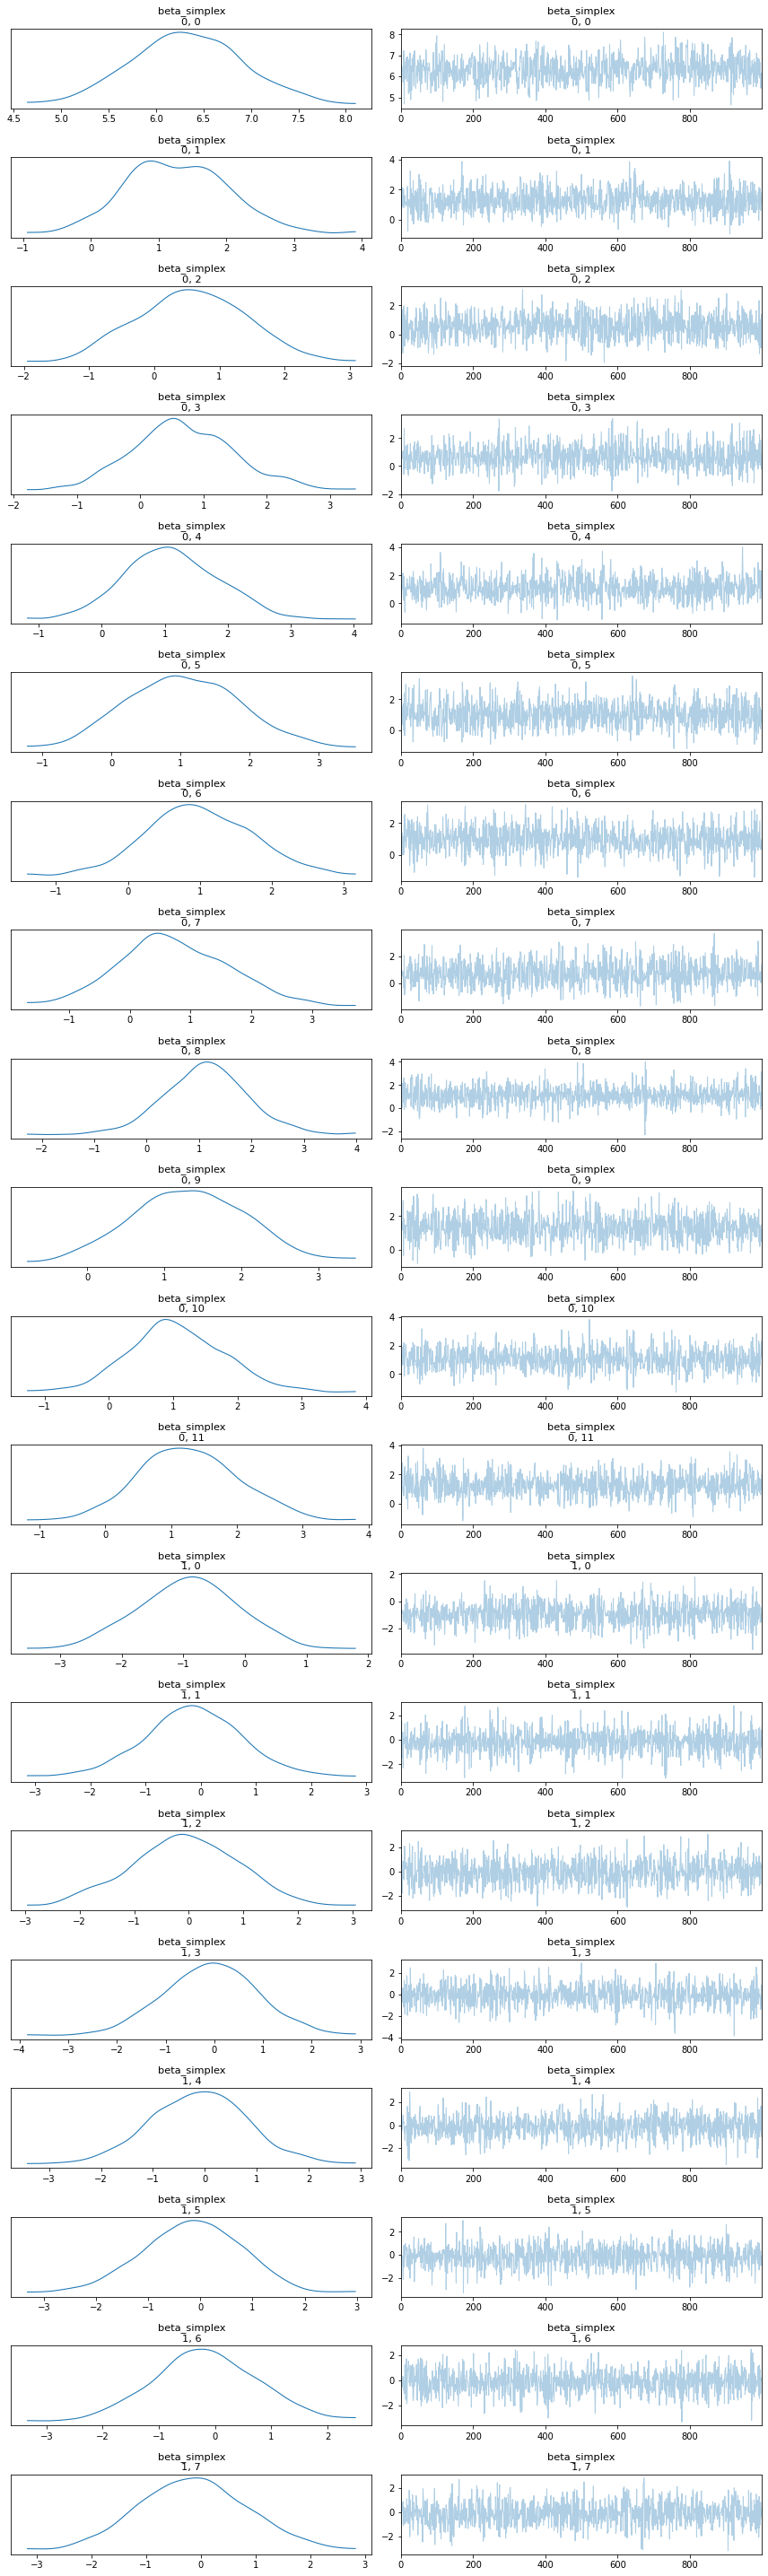

In [37]:
cmdstanpy_data = az.from_cmdstanpy(stan_test_fit)
az.plot_trace(cmdstanpy_data,var_names=["beta_simplex"], compact=False)
plt.tight_layout()
plt.show()

In [38]:
print("Poisson Mixture model WAIC: ", az.waic(cmdstanpy_data,var_name="log_lik"))

Poisson Mixture model WAIC:  Computed from 1000 posterior samples and 5200 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -61003806.13     0.23
p_waic        0.53        -
